In [1]:
from functools import reduce
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
All = pd.read_csv('data\All.csv')
All

In [59]:
data = All.drop(['Metro','Region Code'], axis=1).dropna(axis=0, how='any').reset_index(drop = True)
data[data.Date>'2010-01-01']

,County,State,StateCodeFIPS,MunicipalCodeFIPS,Date,ZHVI,ZHVI_prev,Year,Month,UnemploymentRate,...,private_schools_count,public_schools_count,CPI,Interest Rate,inc,inc_ineql,BD,highschool,migr,residt
0,Autauga,AL,1,1,2010-01-31,185020.0,185531.0,2010,1,10.1,...,6.0,15.0,217.488,0.50,1826597.0,10.938250,21.7,85.3,98.0,54.761
1,Autauga,AL,1,1,2010-02-28,184494.0,185020.0,2010,2,9.5,...,6.0,15.0,217.281,0.75,1826597.0,10.938250,21.7,85.3,98.0,54.761
2,Autauga,AL,1,1,2010-03-31,184039.0,184494.0,2010,3,9.1,...,6.0,15.0,217.353,0.75,1826597.0,10.938250,21.7,85.3,98.0,54.761
3,Autauga,AL,1,1,2010-04-30,183689.0,184039.0,2010,4,8.3,...,6.0,15.0,217.403,0.75,1826597.0,10.938250,21.7,85.3,98.0,54.761
4,Autauga,AL,1,1,2010-05-31,183516.0,183689.0,2010,5,8.1,...,6.0,15.0,217.290,0.75,1826597.0,10.938250,21.7,85.3,98.0,54.761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93835,Wood,WV,54,107,2019-08-31,111511.0,111093.0,2019,8,5.1,...,24.0,127.0,256.118,2.75,3737738.0,15.635667,21.9,89.9,-866.0,83.668
93836,Wood,WV,54,107,2019-09-30,111903.0,111511.0,2019,9,4.1,...,24.0,127.0,256.532,2.50,3737738.0,15.635667,21.9,89.9,-866.0,83.668
93837,Wood,WV,54,107,2019-10-31,112296.0,111903.0,2019,10,4.5,...,24.0,127.0,257.387,2.25,3737738.0,15.635667,21.9,89.9,-866.0,83.668
93838,Wood,WV,54,107,2019-11-30,112553.0,112296.0,2019,11,4.6,...,24.0,127.0,257.989,2.25,3737738.0,15.635667,21.9,89.9,-866.0,83.668


In [13]:
data.describe()

,StateCodeFIPS,MunicipalCodeFIPS,ZHVI,ZHVI_prev,Year,Month,UnemploymentRate,#hospital,hospital_rating,private_schools_count,public_schools_count,CPI,Interest Rate,inc,inc_ineql,BD,highschool,migr,residt
count,93840.000000,93840.000000,9.384000e+04,9.384000e+04,93840.000000,93840.000000,93840.000000,93840.000000,93840.000000,93840.000000,93840.000000,93840.000000,93840.000000,9.384000e+04,93840.000000,93840.000000,93840.000000,93840.000000,93840.000000
mean,29.638107,77.618926,1.715407e+05,1.711192e+05,2014.500000,6.500000,6.471570,2.392583,3.054379,45.874680,189.012788,237.114958,1.235417,1.204608e+07,13.469097,24.374194,86.443555,217.635934,245.942407
std,14.922324,65.587413,1.117078e+05,1.113207e+05,2.872297,3.452071,2.901777,3.178927,0.639616,73.060202,254.880528,11.027962,0.752289,2.444103e+07,3.173888,10.467631,5.692976,4930.850109,452.833985
min,1.000000,1.000000,2.890800e+04,2.890800e+04,2010.000000,1.000000,1.300000,1.000000,1.000000,0.000000,3.000000,217.199000,0.500000,1.975540e+05,7.295149,5.600000,59.900000,-87102.000000,7.822000
25%,13.000000,25.000000,9.988275e+04,9.971275e+04,2012.000000,3.750000,4.300000,1.000000,3.000000,5.000000,32.000000,229.092000,0.750000,1.475661e+06,11.432501,16.000000,83.400000,-536.250000,41.729000
50%,36.000000,63.000000,1.416565e+05,1.413685e+05,2014.500000,6.500000,5.900000,1.000000,3.000000,16.000000,83.500000,237.116000,0.750000,3.527998e+06,12.907991,22.200000,87.500000,98.500000,89.716500
75%,40.000000,113.000000,2.066680e+05,2.061688e+05,2017.000000,9.250000,8.200000,2.000000,3.500000,52.000000,218.000000,244.275500,1.750000,1.129311e+07,14.700157,30.700000,90.500000,1053.250000,257.170250
max,55.000000,453.000000,1.325826e+06,1.325826e+06,2019.000000,12.000000,32.300000,46.000000,5.000000,449.000000,1415.000000,258.203000,3.000000,3.363419e+08,40.780554,75.300000,98.100000,44753.000000,5254.108000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93840 entries, 0 to 93839
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   County                 93840 non-null  object 
 1   State                  93840 non-null  object 
 2   StateCodeFIPS          93840 non-null  int64  
 3   MunicipalCodeFIPS      93840 non-null  int64  
 4   Date                   93840 non-null  object 
 5   ZHVI                   93840 non-null  float64
 6   ZHVI_prev              93840 non-null  float64
 7   Year                   93840 non-null  int64  
 8   Month                  93840 non-null  int64  
 9   UnemploymentRate       93840 non-null  float64
 10  #hospital              93840 non-null  float64
 11  hospital_rating        93840 non-null  float64
 12  private_schools_count  93840 non-null  float64
 13  public_schools_count   93840 non-null  float64
 14  CPI                    93840 non-null  float64
 15  In

# Preliminary 

## KMeans Classification

In [44]:
key_list = ['County','State']
grouped = data.groupby(key_list).mean()
grouped = grouped.drop(['ZHVI','ZHVI_prev','Year','Month','CPI','Interest Rate'], axis=1)
grouped

StateCodeFIPS  MunicipalCodeFIPS  UnemploymentRate  \
County    State                                                       
Abbeville SC              45.0                1.0          7.714167   
Ada       ID              16.0                1.0          4.544167   
Adair     OK              40.0                1.0          6.900000   
Adams     CO               8.0                1.0          6.046667   
          PA              42.0                1.0          4.928333   
...                        ...                ...               ...   
Yates     NY              36.0              123.0          5.694167   
Yavapai   AZ               4.0               25.0          6.735833   
Yolo      CA               6.0              113.0          7.794167   
York      ME              23.0               31.0          4.921667   
          PA              42.0              133.0          5.649167   

                 #hospital  hospital_rating  private_schools_count  \
County    State                                                      
Abbeville SC           1.0         4.000000                    3.0   
Ada       ID           2.0         4.000000                   30.0   
Adair     OK           1.0         4.000000                    5.0   
Adams     CO           3.0         2.666667                   81.0   
          PA           1.0         4.000000                   81.0   
...                    ...              ...                    ...   
Yates     NY           1.0         3.000000                   12.0   
Yavapai   AZ           2.0         3.000000                   12.0   
Yolo      CA           2.0         3.500000                   11.0   
York      ME           2.0         3.500000                   68.0   
          PA           3.0         2.666667                   68.0   

                 public_schools_count         inc  inc_ineql     BD  \
County    State                                                       
Abbeville SC                     10.0    754635.6  13.826694  13.84   
Ada       ID                    138.0  20211046.7  13.492422  36.59   
Adair     OK                     37.0    594369.9  14.788099  12.23   
Adams     CO                    286.0  18309962.8  10.159187  21.98   
          PA                    286.0   4439593.3   9.532741  20.86   
...                               ...         ...        ...    ...   
Yates     NY                      6.0    894938.5  12.577381  23.65   
Yavapai   AZ                    100.0   7729823.5  12.574810  24.86   
Yolo      CA                     65.0  10256727.5  18.301686  39.30   
York      ME                    260.0   9313625.8  11.026288  29.66   
          PA                    260.0  19840719.9  10.519919  22.79   

                 highschool    migr    residt  
County    State                                
Abbeville SC          78.09  -218.9   24.8508  
Ada       ID          94.05  2737.8  433.1925  
Adair     OK          78.42 -1052.3   22.3913  
Adams     CO          82.07  1440.4  482.6378  
          PA          86.90  -972.9  101.8984  
...                     ...     ...       ...  
Yates     NY          85.52   535.4   25.1658  
Yavapai   AZ          90.09  5235.6  220.9331  
Yolo      CA          85.20  5191.6  210.8323  
York      ME          91.98  1379.2  201.7669  
          PA          88.37  1186.5  441.8982  

[781 rows x 13 columns]

C:\Users\15519\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  f"KMeans is known to have a memory leak on Windows "


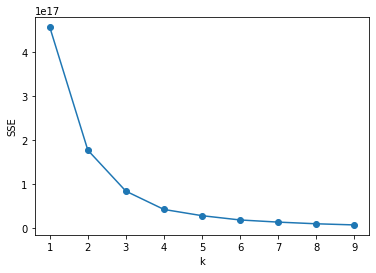

In [45]:
SSE = []  # sum of squared error
for k in range(1, 10):
    estimator = KMeans(init = 'k-means++', n_clusters = k)
    estimator.fit(grouped)
    SSE.append(estimator.inertia_)
X = range(1, 10)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X, SSE, 'o-')
plt.show()

In [56]:
kmeans = KMeans(n_clusters = 4).fit(grouped)
grouped['cluster'] = kmeans.labels_
print(grouped[grouped.cluster == 0].count()[1])
print(grouped[grouped.cluster == 1].count()[1])
print(grouped[grouped.cluster == 2].count()[1])
print(grouped[grouped.cluster == 3].count()[1])


113
639
24
5


# Linear Regression 

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [92]:
data.drop(columns=(['Date']), inplace=True)

In [93]:
category_feature = ['County','State']
y_col = ['ZHVI','ZHVI_prev']
data_category = data.loc[:, data.columns.isin(category_feature)]
data_int = data.loc[:, ~data.columns.isin(category_feature)]

In [94]:
std_columns = []
std_scaler = StandardScaler() # create a scaler object
std_scaler
# fit and transform the data
data_int_std = pd.DataFrame(std_scaler.fit_transform(data_int), columns = data_int.columns)

data_std = pd.concat([data_int_std, data_category], axis = 1)
data_std

,StateCodeFIPS,MunicipalCodeFIPS,ZHVI,ZHVI_prev,Year,Month,UnemploymentRate,#hospital,hospital_rating,private_schools_count,...,CPI,Interest Rate,inc,inc_ineql,BD,highschool,migr,residt,County,State
0,-1.919155,-1.168202,0.120666,0.129462,-1.566699,-1.593255,1.250423,-0.438069,1.478428,-0.545781,...,-1.779754,-0.977577,-0.418130,-0.797401,-0.255474,-0.200872,-0.024263,-0.422191,Autauga,AL
1,-1.919155,-1.168202,0.115957,0.124872,-1.566699,-1.303572,1.043652,-0.438069,1.478428,-0.545781,...,-1.798525,-0.645256,-0.418130,-0.797401,-0.255474,-0.200872,-0.024263,-0.422191,Autauga,AL
2,-1.919155,-1.168202,0.111884,0.120147,-1.566699,-1.013890,0.905805,-0.438069,1.478428,-0.545781,...,-1.791996,-0.645256,-0.418130,-0.797401,-0.255474,-0.200872,-0.024263,-0.422191,Autauga,AL
3,-1.919155,-1.168202,0.108751,0.116060,-1.566699,-0.724207,0.630111,-0.438069,1.478428,-0.545781,...,-1.787462,-0.645256,-0.418130,-0.797401,-0.255474,-0.200872,-0.024263,-0.422191,Autauga,AL
4,-1.919155,-1.168202,0.107202,0.112916,-1.566699,-0.434524,0.561187,-0.438069,1.478428,-0.545781,...,-1.797709,-0.645256,-0.418130,-0.797401,-0.255474,-0.200872,-0.024263,-0.422191,Autauga,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93835,1.632589,0.447971,-0.537384,-0.539222,1.566699,0.434524,-0.472668,-0.438069,-1.648466,-0.299408,...,1.723178,2.013310,-0.339936,0.682627,-0.236367,0.607145,-0.219768,-0.358355,Wood,WV
93836,1.632589,0.447971,-0.533875,-0.535467,1.566699,0.724207,-0.817286,-0.438069,-1.648466,-0.299408,...,1.760719,1.680989,-0.339936,0.682627,-0.236367,0.607145,-0.219768,-0.358355,Wood,WV
93837,1.632589,0.447971,-0.530357,-0.531945,1.566699,1.013890,-0.679439,-0.438069,-1.648466,-0.299408,...,1.838250,1.348668,-0.339936,0.682627,-0.236367,0.607145,-0.219768,-0.358355,Wood,WV
93838,1.632589,0.447971,-0.528056,-0.528415,1.566699,1.303572,-0.644977,-0.438069,-1.648466,-0.299408,...,1.892839,1.348668,-0.339936,0.682627,-0.236367,0.607145,-0.219768,-0.358355,Wood,WV


In [95]:
train_x = data_std.loc[:, ~data_std.columns.isin(y_col)]
train_y = data_std.loc[:, data_std.columns.isin(y_col)]

In [62]:
X = pd.get_dummies(data).drop(columns={'ZHVI'})

y = data.ZHVI
print(X)
print(X.shape)
print(y.shape)
reg = LinearRegression(fit_intercept=True).fit(X, y)

w = reg.coef_
w = [format(i, 'f') for i in w]
print(w)

       StateCodeFIPS  MunicipalCodeFIPS  ZHVI_prev  Year  Month  \
0                  1                  1   185531.0  2010      1   
1                  1                  1   185020.0  2010      2   
2                  1                  1   184494.0  2010      3   
3                  1                  1   184039.0  2010      4   
4                  1                  1   183689.0  2010      5   
...              ...                ...        ...   ...    ...   
93835             54                107   111093.0  2019      8   
93836             54                107   111511.0  2019      9   
93837             54                107   111903.0  2019     10   
93838             54                107   112296.0  2019     11   
93839             54                107   112553.0  2019     12   

       UnemploymentRate  #hospital  hospital_rating  private_schools_count  \
0                  10.1        1.0              4.0                    6.0   
1                   9.5        1.0     

In [57]:
# This function just computes the mean squared error
def MSE(y, pred):
    return np.mean( (np.array(y) - np.array(pred)) ** 2 ) # YOUR CODE HERE 

# This function plots the main diagonal;for a "predicted vs true" plot with perfect predictions, all data lies on this line
def plotDiagonal(xmin, xmax):
    xsamples = np.arange(xmin,xmax,step=0.01)
    plt.plot(xsamples,xsamples,c='black')

# This helper function plots x vs y and labels the axes
def plotdata(x=None,y=None,xname=None,yname=None,margin=0.05,plotDiag=True,zeromin=False):
    plt.scatter(x,y,label='data')
    plt.xlabel(xname)
    plt.ylabel(yname)
    range_x = max(x) - min(x)
    range_y = max(y) - min(y)
    if plotDiag:
        plotDiagonal(min(x)-margin*range_x,max(x)+margin*range_x)
    if zeromin:
        plt.xlim(0.0,max(x)+margin*range_x)
        plt.ylim(0.0,max(y)+margin*range_y)
    else:
        plt.xlim(min(x)-margin*range_x,max(x)+margin*range_x)
        plt.ylim(min(y)-margin*range_y,max(y)+margin*range_y)
    plt.show()

# This function plots the predicted labels vs the actual labels (We only plot the first 1000 points to avoid slow plots)
def plot_pred_true(test_pred=None, test_y=None, max_points = 1000):
    plotdata(test_pred[1:max_points], test_y[1:max_points],'Predicted', 'True', zeromin=True)

In [58]:
def run_OLS(train_y, test_y, train_vals, test_vals):
    ols_model = sm.regression.linear_model.OLS(train_y, train_vals)
    while True: # Bypasses SVD convergence assertion error
        try:
            results = ols_model.fit()
            break
        except:
            None
            
    w = np.array(results.params).reshape([len(results.params),1])

    train_pred = np.matmul(train_vals,w)
    test_pred = np.matmul(test_vals,w)

    train_MSE = MSE(train_y, train_pred.flatten())
    test_MSE = MSE(test_y, test_pred.flatten())
    
    return train_MSE, test_MSE, test_pred

In [ ]:
target = df['price']
price_columns = ['price','weekly_price','monthly_price']
data = df.loc[:, ~df.columns.isin(price_columns)]
# the following variable records the features of examples in the training set
train_x = data
# the following variable records the features of examples in the test set
test_x = data.iloc[t+1:]
# the following variable records the labels of examples in the training set
train_y = target[:t]
# the following variable records the labels of examples in the test set
test_y = target[t+1:]

In [ ]:
train_MSE, test_MSE, test_pred = run_OLS(train_y, test_y, train_x, test_vals)

In [ ]:
print("Train MSE\t", str(train_MSE))
print("Test MSE\t", str(test_MSE))

plot_pred_true(test_pred.flatten(), test_y) #.flatten() will make sure the dimensions match